Tumor Dataset Columns:
Index(['TUMOURID', 'GENDER', 'PATIENTID', 'DIAGNOSISDATEBEST',
       'SITE_ICD10_O2_3CHAR', 'SITE_ICD10_O2',
       'SITE_ICD10R4_O2_3CHAR_FROM2013', 'SITE_ICD10R4_O2_FROM2013',
       'SITE_ICDO3REV2011', 'SITE_ICDO3REV2011_3CHAR', 'MORPH_ICD10_O2',
       'MORPH_ICDO3REV2011', 'BEHAVIOUR_ICD10_O2', 'BEHAVIOUR_ICDO3REV2011',
       'T_BEST', 'N_BEST', 'M_BEST', 'STAGE_BEST', 'GRADE', 'AGE', 'CREG_CODE',
       'STAGE_BEST_SYSTEM', 'LATERALITY', 'SCREENINGSTATUSFULL_CODE',
       'ER_STATUS', 'PR_STATUS', 'HER2_STATUS', 'QUINTILE_2019',
       'DATE_FIRST_SURGERY', 'CANCERCAREPLANINTENT', 'PERFORMANCESTATUS',
       'CHRL_TOT_27_03', 'COMORBIDITIES_27_03', 'GLEASON_PRIMARY',
       'GLEASON_SECONDARY', 'GLEASON_TERTIARY', 'GLEASON_COMBINED'],
      dtype='object')

Patient Dataset Columns:
Index(['PATIENTID', 'GENDER', 'ETHNICITY', 'DEATHCAUSECODE_1A',
       'DEATHCAUSECODE_1B', 'DEATHCAUSECODE_1C', 'DEATHCAUSECODE_2',
       'DEATHCAUSECODE_UNDERLYING', 'DEATH

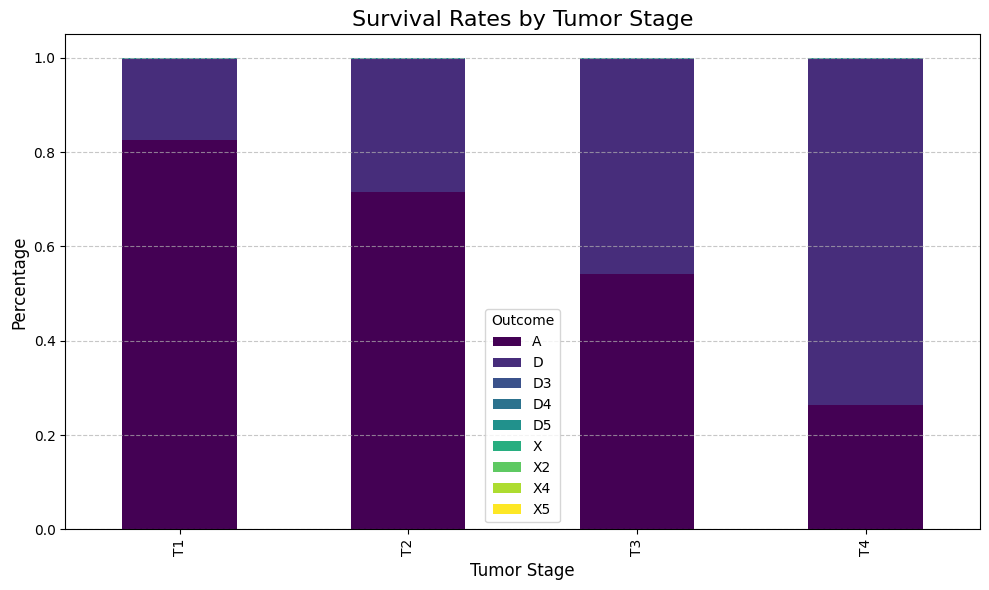

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load Tumor and Patient Datasets
tumour_data_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_tumour.csv"
patients_data_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_patient.csv"

# Load tumor dataset
tumour_data = pd.read_csv(tumour_data_path, low_memory=False)

# Load patients dataset
patients_data = pd.read_csv(patients_data_path, low_memory=False)

# Step 2: Inspect Columns in Both Datasets
print("Tumor Dataset Columns:")
print(tumour_data.columns)

print("\nPatient Dataset Columns:")
print(patients_data.columns)

# Step 3: Merge the Datasets
# Replace "PATIENT_ID" with the correct column name (e.g., "ID", "PatientID", etc.)
merge_key = "PATIENTID"  # Replace with the actual column name
merged_data = pd.merge(tumour_data, patients_data, on=merge_key, how="inner")

print("\nColumns in Merged Dataset:")
print(merged_data.columns)


# Step 4: Define Stage Mapping
stage_mapping = {
    "1": "T1", "2": "T2", "3": "T3", "4": "T4",
    "1A": "T1", "2A": "T2", "3A": "T3", "4A": "T4",
    "1B": "T1", "2B": "T2", "3B": "T3", "4B": "T4"
}

# Apply stage mapping
merged_data["STAGE_BEST_MAPPED"] = merged_data["STAGE_BEST"].map(stage_mapping).fillna("Unknown")

# Filter for valid stages
valid_stages = ["T1", "T2", "T3", "T4"]
merged_data_filtered = merged_data[merged_data["STAGE_BEST_MAPPED"].isin(valid_stages)]

# Step 5: Group by Stage and Calculate Survival Rates
# Assuming "VITALSTATUS" indicates survival (1 = Survived, 0 = Deceased)
survival_rates = (
    merged_data_filtered.groupby("STAGE_BEST_MAPPED")["VITALSTATUS"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .rename(columns={0: "Deceased", 1: "Survived"})
)

print("\nSurvival Rates by Tumor Stage:")
print(survival_rates)

# Step 6: Plot Survival Rates
survival_rates.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

# Add chart details
plt.title("Survival Rates by Tumor Stage", fontsize=16)
plt.xlabel("Tumor Stage", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(title="Outcome", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()



Simplified Survival Rates:
VITALSTATUS_MAPPED  Deceased     Other  Survived
STAGE_BEST_MAPPED                               
T1                  0.172911  0.001466  0.825623
T2                  0.283607  0.001610  0.714783
T3                  0.457615  0.001632  0.540752
T4                  0.734576  0.002279  0.263144
Unknown             0.269682  0.002711  0.727607


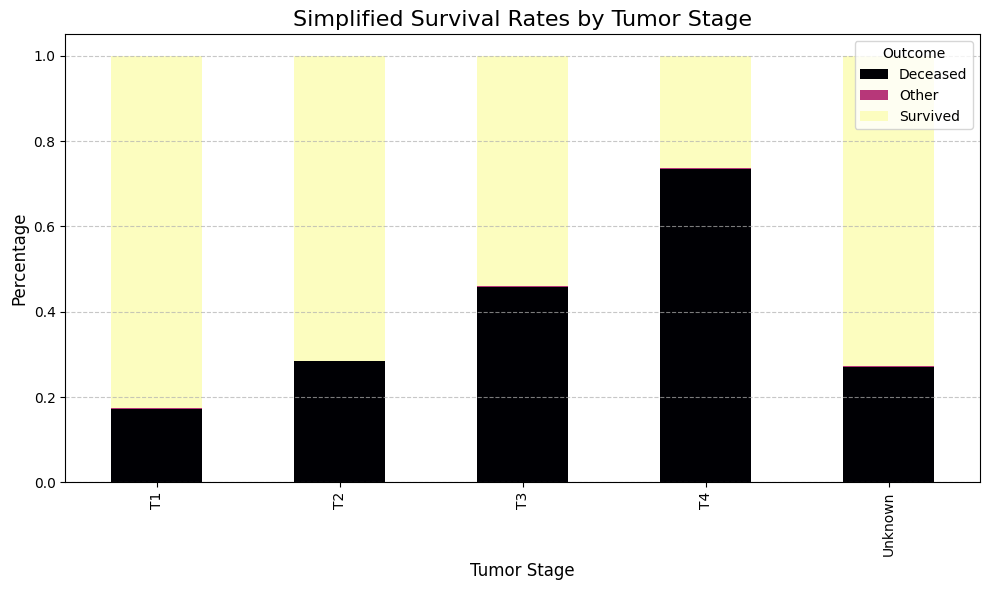

In [15]:
# Map outcomes to Survived/Deceased
outcome_mapping = {
    "A": "Survived",
    "D": "Deceased",
    # Map other relevant values or group as "Other"
}
merged_data["VITALSTATUS_MAPPED"] = merged_data["VITALSTATUS"].map(outcome_mapping).fillna("Other")

# Recalculate survival rates
survival_rates = (
    merged_data.groupby("STAGE_BEST_MAPPED")["VITALSTATUS_MAPPED"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

print("\nSimplified Survival Rates:")
print(survival_rates)

# Plot the simplified survival rates
survival_rates.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="magma")

# Add chart details
plt.title("Simplified Survival Rates by Tumor Stage", fontsize=16)
plt.xlabel("Tumor Stage", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(title="Outcome", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()
